# Taxi Trips Analysis Project

In [182]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## 1: Introduction

In [183]:
# Loading the dataset:
url = "C://Users//Andres//Desktop//AnyoneAI//Proyecto_Final//yellow_tripdata_2022-05.parquet"
df = pd.read_parquet(url, engine="fastparquet")

In [184]:
# We show the first 5 rows of the dataframe:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [185]:
# We show the shape of the dataframe and the data type of values in the columns:
print(df.shape)
print(df.dtypes)

(3588295, 19)
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [186]:
# Check for missing values
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          129524
trip_distance                 0
RatecodeID               129524
store_and_fwd_flag       129524
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     129524
airport_fee              129524
dtype: int64

In [187]:
# We show some descriptive statistics of the numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,2022-05-16 07:50:29.219311616,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,2022-05-16 08:08:42.275203072,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
PULocationID,3588295.0,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599
fare_amount,3588295.0,15.168132,-1311.5,7.0,10.5,17.0,6966.5,14.89484


------

In [188]:
df[
    (df["tip_amount"] < 0)
    | (df["fare_amount"] < 0)
    | (df["extra"] < 0)
    | (df["mta_tax"] < 0)
]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
100,2,2022-05-01 00:46:22,2022-05-01 01:04:25,1.0,4.43,1.0,N,230,7,4,-16.50,-0.5,-0.5,0.00,0.0,-0.3,-20.30,-2.5,0.0
129,2,2022-05-01 00:31:38,2022-05-01 00:33:23,1.0,0.32,1.0,N,263,141,4,-3.50,-0.5,-0.5,0.00,0.0,-0.3,-7.30,-2.5,0.0
602,2,2022-05-01 00:44:58,2022-05-01 00:48:58,1.0,0.79,1.0,N,163,237,4,-5.00,-0.5,-0.5,0.00,0.0,-0.3,-8.80,-2.5,0.0
844,2,2022-05-01 00:48:28,2022-05-01 00:48:36,1.0,0.00,2.0,N,107,107,4,-52.00,0.0,-0.5,0.00,0.0,-0.3,-55.30,-2.5,0.0
884,2,2022-05-01 00:31:21,2022-05-01 00:33:08,1.0,0.67,1.0,N,263,141,4,-4.00,-0.5,-0.5,0.00,0.0,-0.3,-7.80,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571051,2,2022-05-26 15:17:09,2022-05-26 15:18:19,NaN,0.24,NaN,None,50,50,0,-31.28,0.0,0.5,4.30,0.0,0.3,-23.68,NaN,NaN
3571313,2,2022-05-26 16:20:04,2022-05-26 17:29:38,NaN,1.39,NaN,None,79,211,0,-94.29,0.0,0.5,15.79,0.0,0.3,-75.20,NaN,NaN
3582832,2,2022-05-30 01:18:00,2022-05-30 01:36:00,NaN,0.93,NaN,None,209,79,0,-19.40,0.0,0.5,0.00,0.0,0.3,-16.10,NaN,NaN
3583663,2,2022-05-30 12:02:00,2022-05-30 12:47:00,NaN,4.00,NaN,None,263,125,0,-33.58,0.0,0.5,0.00,0.0,0.3,-30.28,NaN,NaN


There're 20692 records with negative numerical values.

--------

`Total_amount:` The total amount charged to passengers. Does not include cash tips.

Can't be negative or extremely high.

In [189]:
df["total_amount"].value_counts().sort_values()

total_amount
149.56        1
111.84        1
116.32        1
142.00        1
155.06        1
          ...  
12.30     48551
10.30     48843
10.80     50237
11.80     50487
11.30     50995
Name: count, Length: 14379, dtype: int64

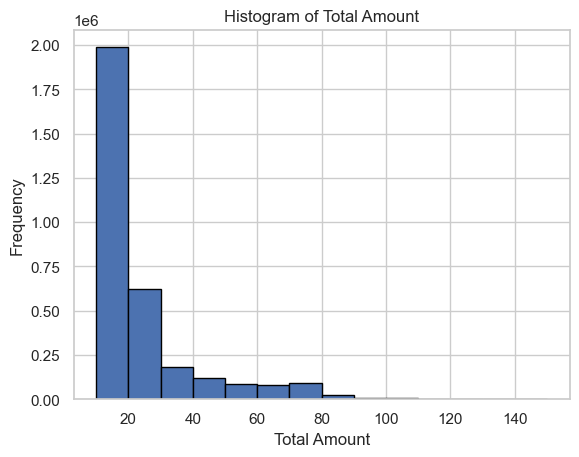

In [190]:
# We create a histogram of the 'total amount' column:
plt.hist(
    df["total_amount"],
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor="black",
)
plt.title("Histogram of Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

`Congestion_Surcharge:` Total amount collected in trip for NYS congestion surcharge.

The rate depends on the type of vehicle used to provide transportation in or through the congestion zone. The surcharge is generally:

- $2.75 for each for-hire transportation trip in a vehicle that is not a medallion taxicab or a pool vehicle.
- $2.50 per trip when the transportation is provided by a medallion taxicab vehicle.
- $0.75 per pool trip.

This amount is required to be passed through to passengers and reported separately on any receipt given to the passenger.  

In [191]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.50    3174755
 0.00     267509
-2.50      16485
 2.75         10
 0.75          9
-0.75          2
 1.00          1
Name: count, dtype: int64

`Airport_fee:` $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.

So it should be either $1.25 or 0. Other values to be considered as mistake.

In [192]:
df["airport_fee"].value_counts()

airport_fee
 0.00    3175153
 1.25     281317
-1.25       2301
Name: count, dtype: int64

``Improvement_surcharge:`` $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

So it should be either 0.30 or 0. Other values to be considered as mistake.

In [193]:
df["improvement_surcharge"].value_counts()

improvement_surcharge
 0.3    3566256
-0.3      20663
 0.0       1376
Name: count, dtype: int64

``MTA_tax:`` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Should be either 0 or 0.5

In [194]:
df["mta_tax"].value_counts()

mta_tax
 0.50    3530087
 0.00      38227
-0.50      19969
 3.30          2
 0.07          2
 2.80          1
 0.11          1
-0.07          1
 0.26          1
 0.35          1
 0.12          1
 0.10          1
 0.08          1
Name: count, dtype: int64

``Extra:`` Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

Should be either 0.5, 1 or 0

In [195]:
df["extra"].value_counts()

extra
0.00    1478115
0.50     649518
2.50     506543
1.00     441814
3.00     235008
         ...   
0.05          1
4.80          1
2.51          1
8.55          1
4.82          1
Name: count, Length: 61, dtype: int64

In [196]:
df["extra"].unique()

array([ 3.  ,  0.  ,  0.5 ,  1.75,  1.25, -0.5 ,  2.5 ,  3.75,  4.25,
        2.51,  3.5 ,  1.  ,  2.25,  8.25,  0.8 ,  4.75,  3.3 ,  4.5 ,
        7.  , -1.  ,  5.75, -4.5 ,  3.25,  2.  ,  4.  ,  8.55, -2.  ,
        3.65,  3.8 , -2.5 ,  1.8 ,  4.8 ,  0.05,  4.3 ,  1.3 , -3.  ,
        6.55,  7.8 ,  1.02,  5.3 ,  7.05,  7.5 ,  0.02,  2.95,  2.8 ,
        6.3 ,  4.55,  8.3 ,  1.5 ,  1.55,  0.55,  8.8 ,  0.06,  0.09,
        5.25,  4.79,  2.67,  2.81,  2.9 ,  3.55,  4.82])

In [197]:
# df[df["extra"] <= 0.5]

`Fare_amount:` The time-and-distance fare calculated by the meter.

The fare can be different, but it can't be less than 0 or astronomicaly high.


In [198]:
df["fare_amount"].sort_values()

2536784   -1311.5
1779648    -900.0
2345183    -576.0
1595148    -535.0
1636750    -500.0
            ...  
3248725     855.0
1779649     900.0
1788460     900.0
2536785    1311.5
3414224    6966.5
Name: fare_amount, Length: 3588295, dtype: float64

`Tolls_amount:` Total amount of all tolls paid in trip.

Can't be negative

In [199]:
df["tolls_amount"].sort_values()

2292202    -50.75
791592     -47.00
297347     -45.00
2345183    -40.30
1163481    -38.55
            ...  
3193077     99.25
864403     109.70
32607      239.13
1924093    685.58
2349147    813.75
Name: tolls_amount, Length: 3588295, dtype: float64

`Tip_amount:` This field is automatically populated for credit card tips. Cash tips are not included.

Can't be negative

In [200]:
df["tip_amount"].sort_values()

3320234   -145.70
2124407    -89.96
3273841    -88.08
1904862    -75.00
1055074    -62.84
            ...  
765043     300.00
2499800    300.00
3146700    300.01
2720989    408.00
3107847    665.00
Name: tip_amount, Length: 3588295, dtype: float64

`Payment_type:` A numeric code signifying how the passenger paid for the trip. 

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

In [201]:
df.payment_type.value_counts()

payment_type
1    2720127
2     706333
0     129524
3      16333
4      15978
Name: count, dtype: int64

We found 129524 corresponding to the value 0. This is an error since it does not fit any number to describe the feature.

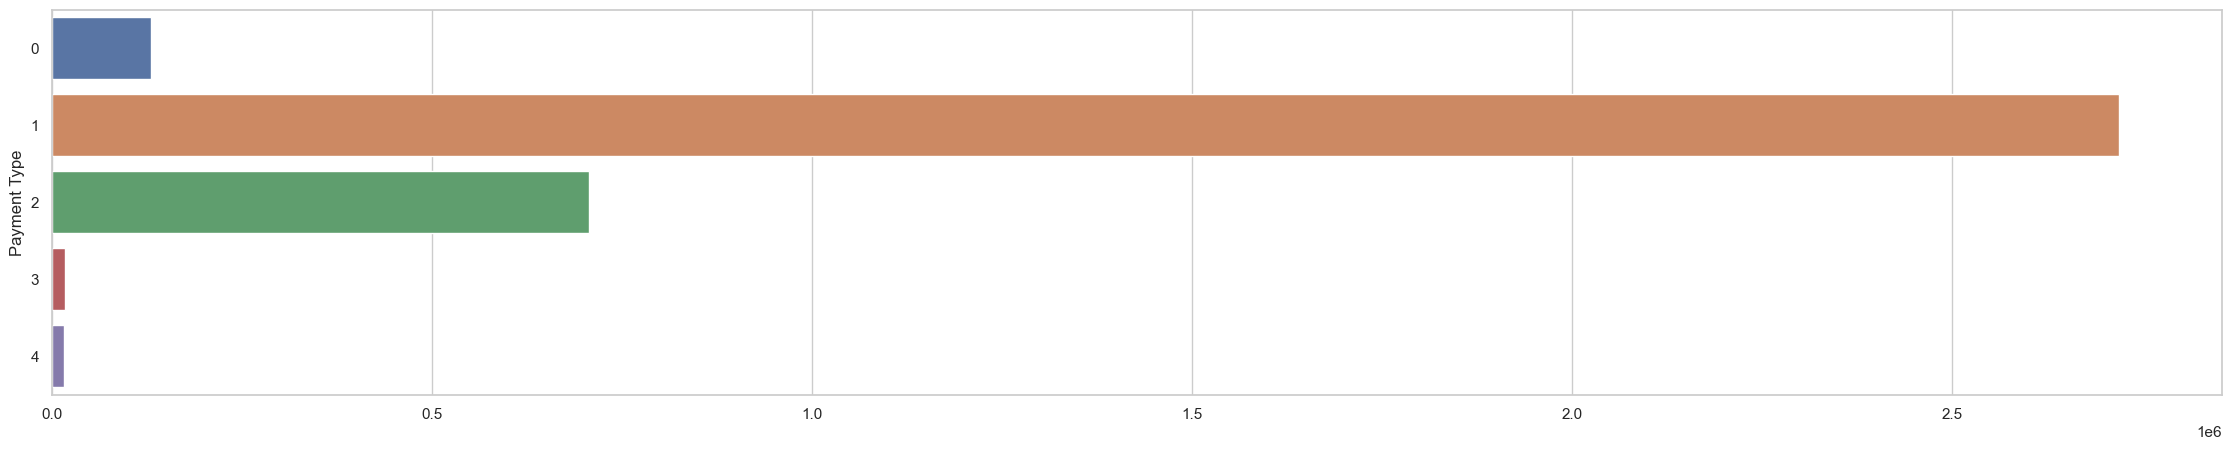

In [202]:
plt.figure(figsize=(28, 5))
sns.countplot(data=df, y="payment_type", orient="h")
# plt.yticks(np.arange(5), ["Credit Card", "Cash", "No Charge", "Dispute", "Unknown"])
plt.ylabel("Payment Type")
plt.xlabel(None)
plt.show()

`Trip_distance:` The elapsed trip distance in miles reported by the taximeter.

If measured correctly it shouldn't be equal to 0 or astronomicaly high.

It can also be strange comparing to starting-ending time of the trip (1 hour long trip and 200 miles)


In [203]:
df.trip_distance.sort_values()

482906          0.00
427332          0.00
698193          0.00
2431890         0.00
3234863         0.00
             ...    
3543592    275692.34
3482491    281179.94
3469281    333632.96
3543875    344408.48
3528934    357192.65
Name: trip_distance, Length: 3588295, dtype: float64

In [204]:
df[df["trip_distance"] > 1000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
430036,2,2022-05-05 06:03:36,2022-05-05 06:14:37,1.0,29445.65,5.0,N,263,107,1,12.06,0.0,0.5,1.18,0.0,0.3,16.54,2.5,0.0
1656265,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.93,1.0,N,263,262,2,0.00,0.0,-0.5,0.00,0.0,-0.3,-3.30,-2.5,0.0
1656266,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.93,1.0,N,263,262,2,0.00,0.0,0.5,0.00,0.0,0.3,3.30,2.5,0.0
2463414,2,2022-05-22 13:43:22,2022-05-22 13:57:30,1.0,7496.85,1.0,N,237,170,1,40.50,0.0,0.5,8.76,0.0,0.3,52.56,2.5,0.0
3226642,2,2022-05-29 15:02:46,2022-05-29 15:08:35,3.0,2946.95,1.0,N,237,43,2,48.00,0.0,0.5,0.00,0.0,0.3,51.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584552,2,2022-05-30 18:22:00,2022-05-30 18:37:00,NaN,128742.58,NaN,None,229,145,0,13.31,0.0,0.5,1.00,0.0,0.3,17.61,NaN,NaN
3585670,2,2022-05-31 07:59:00,2022-05-31 08:28:00,NaN,131884.34,NaN,None,167,41,0,20.43,0.0,0.5,0.00,0.0,0.3,21.23,NaN,NaN
3585679,2,2022-05-31 07:44:00,2022-05-31 08:04:00,NaN,109774.82,NaN,None,42,50,0,28.30,0.0,0.5,7.01,0.0,0.3,38.61,NaN,NaN
3588029,2,2022-05-31 20:17:00,2022-05-31 20:43:00,NaN,45022.68,NaN,None,33,68,0,20.73,0.0,0.5,5.34,0.0,0.3,29.37,NaN,NaN


In [205]:
# Showing rows with any distance data equals to 0:
df[(df["trip_distance"] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.20,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
25,1,2022-05-01 00:16:00,2022-05-01 00:16:00,1.0,0.0,1.0,N,142,264,2,6.00,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
246,1,2022-05-01 00:17:06,2022-05-01 00:17:25,1.0,0.0,5.0,Y,229,229,2,75.00,0.0,0.0,0.00,0.0,0.3,75.30,0.0,0.0
330,1,2022-05-01 00:12:49,2022-05-01 00:29:29,1.0,0.0,1.0,N,152,241,1,29.20,0.0,0.5,0.00,0.0,0.3,30.00,0.0,0.0
472,1,2022-05-01 00:53:02,2022-05-01 00:53:47,1.0,0.0,1.0,N,230,230,3,2.50,3.0,0.5,0.00,0.0,0.3,6.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587292,2,2022-05-31 17:46:00,2022-05-31 17:51:00,NaN,0.0,NaN,None,13,13,0,19.56,0.0,0.5,5.07,0.0,0.3,27.93,NaN,NaN
3587910,2,2022-05-31 19:02:47,2022-05-31 19:02:57,NaN,0.0,NaN,None,140,140,0,23.33,0.0,0.5,5.91,0.0,0.3,32.54,NaN,NaN
3587927,2,2022-05-31 19:25:00,2022-05-31 19:25:09,NaN,0.0,NaN,None,224,224,0,15.36,0.0,0.5,4.13,0.0,0.3,22.79,NaN,NaN
3588054,2,2022-05-31 21:18:44,2022-05-31 21:19:03,NaN,0.0,NaN,None,50,50,0,10.00,0.0,0.5,1.00,0.0,0.3,14.30,NaN,NaN


`Store_and_fwd_flag:` This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

- Y= store and forward trip
- N= not a store and forward trip

In [206]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    3404113
Y      54658
Name: count, dtype: int64

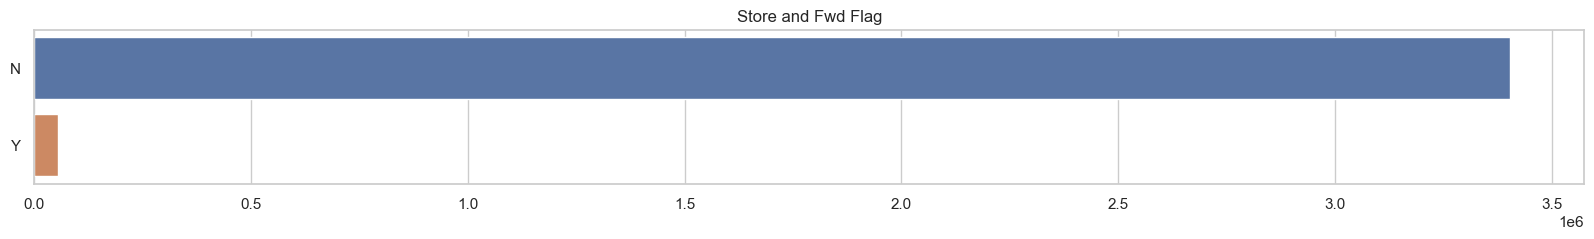

In [207]:
plt.figure(figsize=(20, 2))
sns.countplot(data=df, y="store_and_fwd_flag", orient="h")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Store and Fwd Flag")
plt.show()

`RateCodeID:` The final rate code in effect at the end of the trip.

1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [208]:
df.RatecodeID.value_counts()

RatecodeID
1.0     3256985
2.0      147239
5.0       28382
3.0       11636
99.0       9864
4.0        4626
6.0          39
Name: count, dtype: int64

99 is not a value compatible with the description.

`Passenger_count:` The number of passengers in the vehicle. This is a driver-entered value.

0 passengers considered as mistake

In [209]:
df["passenger_count"].value_counts()

passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64

`VendorID:` A code indicating the TPEP provider that provided the record. 

- 1= Creative Mobile Technologies, LLC 
- 2= VeriFone Inc.

We only have two options, therefore, any other number is considered an error.

In [210]:
df["VendorID"].value_counts()

VendorID
2    2527997
1    1054130
6       6154
5         14
Name: count, dtype: int64

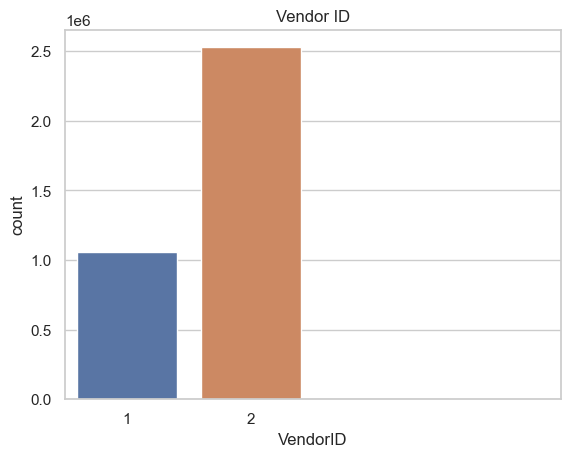

In [211]:
sns.countplot(data=df, x="VendorID")
plt.xticks([0, 1], ["1", "2"])
plt.title("Vendor ID")
plt.show()

------------

## Data Preprocessing

### Steps to perform

1. Change all money-related negative values to non-negative by taking their absolute values
2. Remove trips where improvement_surcharge is not equal to 0.3 or 0
3. Remove trips where mta_tax is not equal to 0 or 0.5
4. Remove trips where extra is not equal to 0.5, 1 or 0
5. Remove extremely high Fare_amount and total_amount
6. Replace '99' in RateCodeID with the most frequently observed 1
7. Remove rows with extremely high values of Tip_amount , Tolls_amount , fare_amount and Total_amount
8. Convert date columns to datetime format

### 1. Change all money-related negative values to non-negative by taking their absolute values

In [212]:
data_taxi = df.copy()
data_taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [213]:
# Taking money-related numerical values
data_taxi.columns[-9:]

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee'],
      dtype='object')

In [214]:
(data_taxi.loc[:, data_taxi.columns[-9:]] < 0).sum()

fare_amount              20506
extra                     9917
mta_tax                  19970
tip_amount                 237
tolls_amount               925
improvement_surcharge    20663
total_amount             20709
congestion_surcharge     16487
airport_fee               2301
dtype: int64

In [215]:
data_taxi.loc[:, data_taxi.columns[-9:]] = data_taxi.loc[
    :, data_taxi.columns[-9:]
].abs()

In [216]:
(data_taxi.loc[:, data_taxi.columns[-9:]] < 0).sum()

fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

--------------

### 2/5. Remove wrong values from: `Congestion_Surcharge`, `mta_tax`, `extra`, `payment_type`, `VendorID`

Ver 'extra' porque tiene muchos valores son mas de 1
En 'payment_type' muchos valores en 0 -> asignar a 1 (Credit card)

In [217]:
# Identificar los valores incorrectos basados en un patrón específico
incorrect_values = data_taxi[
    (data_taxi["extra"] != 0) & (data_taxi["extra"] != 1) & (data_taxi["extra"] != 0.5)
]

# Definir el patrón de valores incorrectos, en este caso, cercanos a 0.50 o múltiplos de 0.05
pattern_threshold = 0.1  # Umbral para considerar valores cercanos a 0.50
multiples_threshold = 0.01  # Umbral para considerar múltiplos de 0.05

# Iterar sobre los valores incorrectos y asignarles valores válidos
for index, row in incorrect_values.iterrows():
    value = row["extra"]

    if abs(value - 0.50) <= pattern_threshold:
        corrected_value = 0.5
    elif abs(value % 0.05) <= multiples_threshold:
        corrected_value = round(value, 1)
    else:
        # Si no sigue el patrón identificado, asignar el valor más cercano válido
        corrected_value = 0 if abs(value - 0.5) < abs(value - 1) else 1

    # Asignar el valor corregido al DataFrame original
    data_taxi.at[index, "extra"] = corrected_value

# Ahora 'data_taxi' contiene los valores corregidos en la columna 'extra'
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.00,1.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.00,1.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.50,1.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.20,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.50,1.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588290,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,20.97,0.0,0.5,1.00,0.0,0.3,22.77,NaN,NaN
3588291,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,11.68,0.0,0.0,2.51,0.0,0.3,16.99,NaN,NaN
3588292,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,14.54,0.0,0.5,0.00,0.0,0.3,17.84,NaN,NaN
3588293,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,24.01,0.0,0.5,5.54,0.0,0.3,30.35,NaN,NaN


In [218]:
data_taxi[
    (~data_taxi["congestion_surcharge"].isin([0.75, 2.50, 2.75]))
    | (~data_taxi["mta_tax"].isin([0, 0.5]))
    | (~data_taxi["extra"].isin([0, 0.5, 1]))
    | (~data_taxi["payment_type"].isin([1, 2, 3, 4, 5, 6]))
    | (~data_taxi["VendorID"].isin([1, 2]))
].shape[0]

397065

In [219]:
data_taxi.drop(
    data_taxi[
        (~data_taxi["congestion_surcharge"].isin([0.75, 2.50, 2.75]))
        | (~data_taxi["mta_tax"].isin([0, 0.5]))
        | (~data_taxi["extra"].isin([0, 0.5, 1]))
        | (~data_taxi["payment_type"].isin([1, 2, 3, 4, 5, 6]))
        | (~data_taxi["VendorID"].isin([1, 2]))
    ].index,
    inplace=True,
)

In [220]:
data_taxi.shape

(3191230, 19)

### 6. `RatecodeID` processing

Replace 99 with 1

In [221]:
data_taxi[data_taxi["RatecodeID"] == 99].shape[0]

6

In [222]:
data_taxi["RatecodeID"] = np.where(
    data_taxi["RatecodeID"] == 99, 1, data_taxi["RatecodeID"]
)

In [223]:
data_taxi[data_taxi["RatecodeID"] == 99].shape[0]

0

### 7. Remove rows with extremely high values of Tip_amount , Tolls_amount , fare_amount and Total_amount

In [224]:
# percentiles = [0.25, 0.5, 0.75, 0.95]  # Agrega los percentiles que deseas calcular

# Obtener las estadísticas descriptivas de las columnas
data_taxi[["tip_amount", "tolls_amount", "fare_amount", "total_amount"]].describe()

# # Calcular los percentiles adicionales y agregarlos a las estadísticas descriptivas
# percentile_values = data_taxi[['tip_amount', 'tolls_amount', 'fare_amount', 'total_amount']].quantile(percentiles)
# percentile_values.rename(index={p: f'{p*100}%' for p in percentiles}, inplace=True)
# stats = stats.append(percentile_values)

# # Mostrar las estadísticas descriptivas y percentiles
# print(stats)

,tip_amount,tolls_amount,fare_amount,total_amount
count,3.191230e+06,3.191230e+06,3.191230e+06,3.191230e+06
mean,2.667568e+00,4.827128e-01,1.372668e+01,2.059613e+01
std,2.919598e+00,1.787446e+00,1.197705e+01,1.536394e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,7.000000e+00,1.230000e+01
50%,2.160000e+00,0.000000e+00,1.000000e+01,1.580000e+01
75%,3.330000e+00,0.000000e+00,1.550000e+01,2.195000e+01
max,4.080000e+02,6.855800e+02,6.966500e+03,6.970800e+03


In [225]:
# Obtener el valor máximo de las columnas "total_amount" y "fare_amount"
max_total_amount = data_taxi["total_amount"].max()
max_fare_amount = data_taxi["fare_amount"].max()

# Eliminar las filas que contienen el valor máximo en ambas columnas
data_taxi = data_taxi.drop(
    data_taxi[
        (data_taxi["total_amount"] == max_total_amount)
        & (data_taxi["fare_amount"] == max_fare_amount)
    ].index
)

# Ahora, el DataFrame "data_taxi" no contiene las filas con los valores máximos en "total_amount" y "fare_amount"
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,1.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,1.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,1.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,1.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.0,0.3,15.96,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458766,2,2022-05-31 23:32:53,2022-05-31 23:38:24,1.0,1.33,1.0,N,161,236,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
3458767,2,2022-05-31 23:50:58,2022-05-31 23:57:27,1.0,1.89,1.0,N,142,238,1,8.0,0.5,0.5,3.54,0.0,0.3,15.34,2.5,0.0
3458768,2,2022-05-31 23:43:33,2022-05-31 23:57:09,1.0,3.43,1.0,N,186,43,1,12.5,0.5,0.5,1.00,0.0,0.3,17.30,2.5,0.0
3458769,2,2022-05-31 23:01:31,2022-05-31 23:04:42,2.0,0.95,1.0,N,239,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0


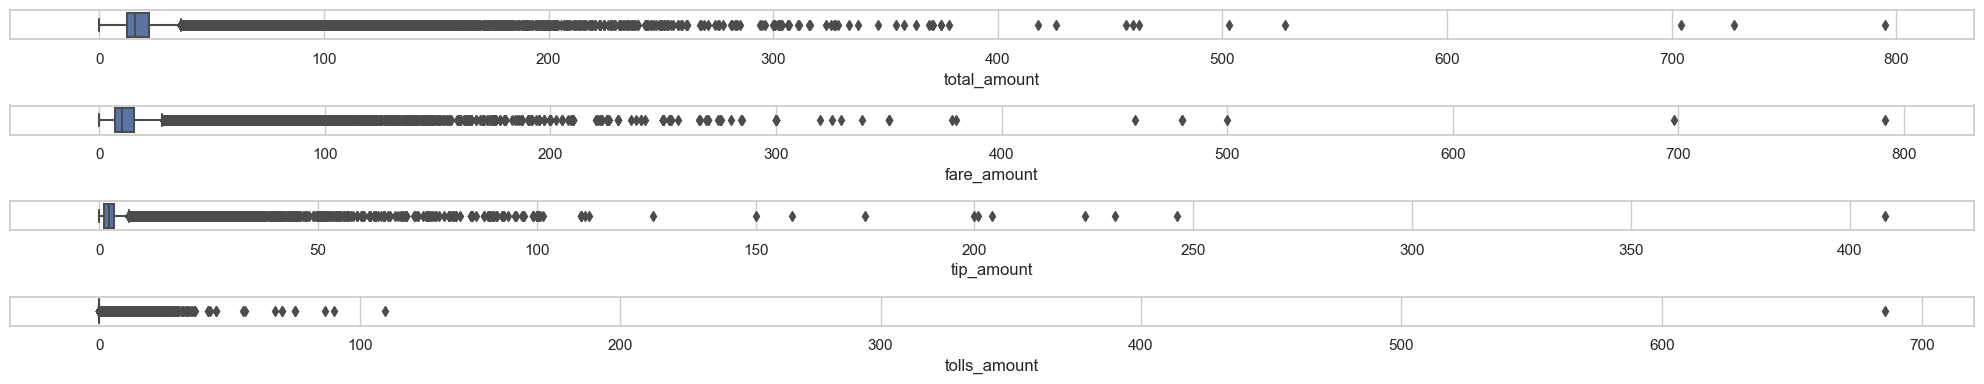

In [226]:
fig, axs = plt.subplots(4, 1, figsize=(20, 4))
sns.boxplot(data=data_taxi, x="total_amount", ax=axs[0])
sns.boxplot(data=data_taxi, x="fare_amount", ax=axs[1])
sns.boxplot(data=data_taxi, x="tip_amount", ax=axs[2])
sns.boxplot(data=data_taxi, x="tolls_amount", ax=axs[3])
plt.tight_layout()
plt.show()

In [227]:
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,1.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,1.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,1.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,1.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.0,0.3,15.96,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458766,2,2022-05-31 23:32:53,2022-05-31 23:38:24,1.0,1.33,1.0,N,161,236,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
3458767,2,2022-05-31 23:50:58,2022-05-31 23:57:27,1.0,1.89,1.0,N,142,238,1,8.0,0.5,0.5,3.54,0.0,0.3,15.34,2.5,0.0
3458768,2,2022-05-31 23:43:33,2022-05-31 23:57:09,1.0,3.43,1.0,N,186,43,1,12.5,0.5,0.5,1.00,0.0,0.3,17.30,2.5,0.0
3458769,2,2022-05-31 23:01:31,2022-05-31 23:04:42,2.0,0.95,1.0,N,239,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0


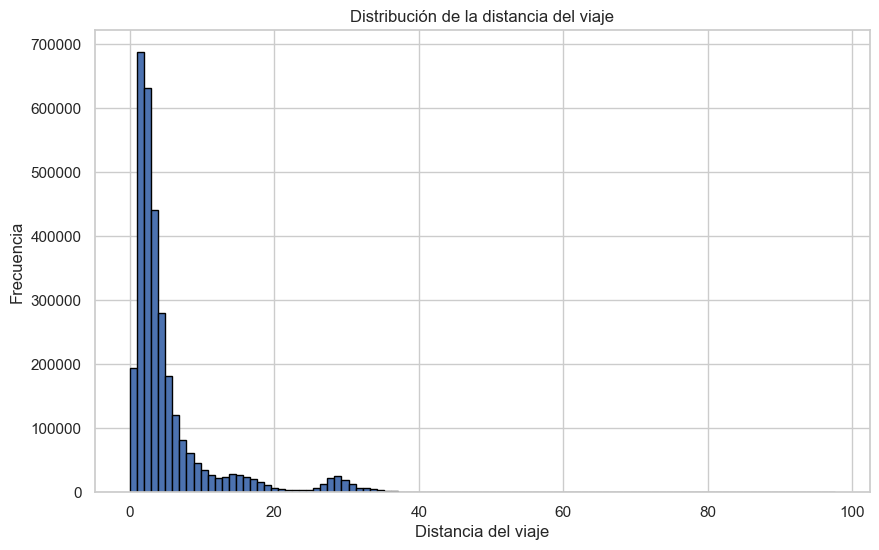

In [243]:
import matplotlib.pyplot as plt

# Extraer la columna "trip_distance" del dataframe
trip_distance = data_taxi["trip_distance"]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar el histograma de la variable "trip_distance" en un gráfico de barras
plt.hist(trip_distance, bins=100, edgecolor="black")

# Configurar etiquetas y título del gráfico
plt.xlabel("Distancia del viaje")
plt.ylabel("Frecuencia")
plt.title("Distribución de la distancia del viaje")

# Mostrar el gráfico
plt.show()

### Filtering: `duration`, `trip_distance`, `fare_amount`

In [229]:
data_taxi["duration"] = (
    data_taxi["tpep_dropoff_datetime"] - data_taxi["tpep_pickup_datetime"]
).dt.total_seconds() / 60

In [230]:
data_taxi["trip_distance"] *= 1.61

In [231]:
data_taxi["trip_distance"].nlargest(15)

430036     47407.4965
2463414    12069.9285
1656265    10424.6373
1656266    10424.6373
3226642     4744.5895
1188664      295.4833
1942923      230.6486
13914        206.0961
127891       201.8135
1590733      192.2179
3272103      185.7135
2474285      183.4917
2059581      182.5740
3202292      165.1699
121077       158.2630
Name: trip_distance, dtype: float64

In [232]:
data_taxi[data_taxi["fare_amount"] == 0].shape[0]

315

In [233]:
data_taxi = data_taxi[
    (data_taxi["trip_distance"] > 0)
    & (data_taxi["trip_distance"] < 100)
    & (data_taxi["fare_amount"] > 0)
    & (data_taxi["passenger_count"] > 0)
]

In [234]:
data_taxi.shape

(3106567, 20)

In [235]:
data_taxi.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
duration                 0
dtype: int64

### Duration variable

In [236]:
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,6.6010,1.0,N,246,151,2,17.0,1.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,18.700000
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,3.7030,1.0,N,238,74,2,11.0,1.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,13.816667
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,6.7620,1.0,N,163,260,2,15.5,1.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,15.366667
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,2.5760,1.0,N,238,75,1,7.5,1.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,9.383333
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,3.0107,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.0,0.3,15.96,2.5,0.0,11.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458766,2,2022-05-31 23:32:53,2022-05-31 23:38:24,1.0,2.1413,1.0,N,161,236,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0,5.516667
3458767,2,2022-05-31 23:50:58,2022-05-31 23:57:27,1.0,3.0429,1.0,N,142,238,1,8.0,0.5,0.5,3.54,0.0,0.3,15.34,2.5,0.0,6.483333
3458768,2,2022-05-31 23:43:33,2022-05-31 23:57:09,1.0,5.5223,1.0,N,186,43,1,12.5,0.5,0.5,1.00,0.0,0.3,17.30,2.5,0.0,13.600000
3458769,2,2022-05-31 23:01:31,2022-05-31 23:04:42,2.0,1.5295,1.0,N,239,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0,3.183333


In [237]:
data_taxi["trip_distance"].nlargest(15)

861395     97.5821
861396     97.5821
2062657    96.8415
1642864    96.1009
516067     95.8755
464124     95.8272
1119390    94.1045
459245     94.0562
3253703    93.9274
2195527    93.0580
230178     93.0419
3379225    92.8487
1024525    92.8165
1092313    92.4462
1524112    92.1725
Name: trip_distance, dtype: float64

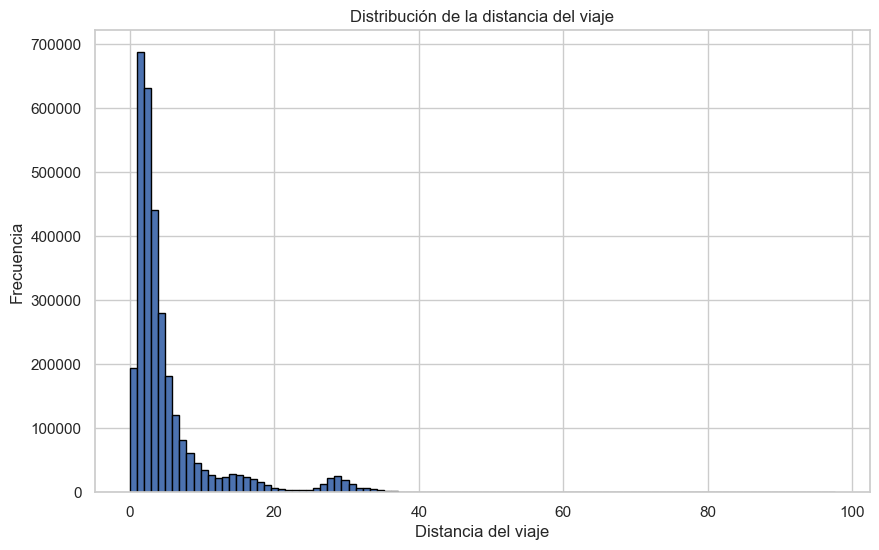

In [242]:
import matplotlib.pyplot as plt

# Extraer la columna "trip_distance" del dataframe
trip_distance = data_taxi["trip_distance"]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar el histograma de la variable "trip_distance" en un gráfico de barras
plt.hist(trip_distance, bins=100, edgecolor="black")

# Configurar etiquetas y título del gráfico
plt.xlabel("Distancia del viaje")
plt.ylabel("Frecuencia")
plt.title("Distribución de la distancia del viaje")

# Mostrar el gráfico
plt.show()

In [239]:
asdasdasd

NameError: name 'asdasdasd' is not defined

## Modeling

### Performing Logistic

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_taxi.drop("fare_amount", axis=1)
y = data_taxi["fare_amount"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_test = lr.predict(X_test)
lr_pred_trai = lr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el error cuadrático medio (MSE)
lr_mse = mean_squared_error(y_test, lr_pred_test)

# Calcula el error absoluto medio (MAE)
lr_mae = mean_absolute_error(y_test, lr_pred_test)

# Calcula el coeficiente de determinación (R^2)
lr_r2 = r2_score(y_test, lr_pred_test)

print("MSE:", lr_mse)
print("MAE:", lr_mae)
print("R^2:", lr_r2)

In [ ]:
asdasd

In [ ]:
import geopandas as gpd

# Read the shapefile
url_location = "C://Users//Andres//Desktop//AnyoneAI//Proyecto_Final//taxi_zones.zip"
gdf = gpd.read_file(url_location)

# Print the first few rows of the GeoDataFrame
gdf

In [ ]:
# import geopandas as gpd

# # Cargar el dataframe
# # dataframe = gpd.read_file('nombre_del_archivo.shp')

# # Extraer las coordenadas de longitud y latitud
# gdf["longitude"] = gdf["geometry"].centroid.x
# gdf["latitude"] = gdf["geometry"].centroid.y

# # Imprimir el resultado
# print(gdf[["OBJECTID", "longitude", "latitude"]])

In [ ]:
gdf.info()

In [ ]:
# Agregar columnas 'PUZone' y 'DOZone' en df
# df["PUZone"] = df["PULocationID"]
# df["DOZone"] = df["DOLocationID"]

# Combinar df y gdf utilizando 'LocationID' como clave
df = df.merge(
    gdf[["LocationID", "geometry"]],
    how="left",
    left_on="PULocationID",
    right_on="LocationID",
)
df.rename(columns={"geometry": "PUZone"}, inplace=True)

df = df.merge(
    gdf[["LocationID", "geometry"]],
    how="left",
    left_on="DOLocationID",
    right_on="LocationID",
)
df.rename(columns={"geometry": "DOZone"}, inplace=True)

# Eliminar columnas adicionales
df.drop(["LocationID_x", "LocationID_y"], axis=1, inplace=True)

In [ ]:
# # Agregar columnas 'PUZone' y 'DOZone' en df
# # df["PUZone"] = df["PULocationID"]
# # df["DOZone"] = df["DOLocationID"]

# # Combinar df y gdf utilizando 'LocationID' como clave
# df = df.merge(
#     gdf[["LocationID", "longitude", "latitude"]],
#     how="left",
#     left_on="PULocationID",
#     right_on="LocationID",
# )
# df.rename(columns={"longitude": "pickup_long", "latitude": "pickup_lat"}, inplace=True)

# df = df.merge(
#     gdf[["LocationID", "longitude", "latitude"]],
#     how="left",
#     left_on="DOLocationID",
#     right_on="LocationID",
# )
# df.rename(columns={"longitude": "drop_long", "latitude": "drop_lat"}, inplace=True)

# # Eliminar columnas adicionales
# df.drop(["LocationID_x", "LocationID_y"], axis=1, inplace=True)

In [ ]:
df

In [ ]:
df_subset = df.sample(100, random_state=42)

In [ ]:
df_subset